<a href="https://colab.research.google.com/github/lunarcyclist/Titanic_Survival_Analysis/blob/main/Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Prediction - Siddhant Varshney (21BCE0277)**

Project Steps:

1. Library Installation & Setup – Installed necessary libraries and set up the environment for data analysis and modeling.

2. Weights & Biases Integration – Logged into Weights & Biases for experiment tracking and model performance visualization.

3. Data Preprocessing – Handled missing values, encoded categorical variables, and standardized numerical features.

4. Feature Engineering – Created new features like FamilySize and HasCabin to enhance predictive performance.

5. Correlation Matrix & Feature Selection – Identified relationships between features and removed highly correlated or irrelevant ones.

6. Outlier Detection – Used boxplots to detect and analyze extreme values affecting model performance.

7. Addressing Class Imbalance – Applied SMOTE to balance survival classes and improve model generalization.

8. Tableau Visualizations for Survival Analysis – Visualized survival dependency on passenger class, age, gender, and other factors.

9. Model Training & Hyperparameter Tuning – Trained models like Random Forest and XGBoost, optimizing parameters for best accuracy.

1. **Library Installation & Setup**

a)	*Installed the necessary libraries using pip*: pandas, numpy, seaborn, matplotlib, scikit-learn, imbalanced-learn, xgboost, wandb, optuna

b)	*Imported essential modules for*:

(i)Data manipulation: pandas, numpy

(ii)	Data visualization: matplotlib, seaborn

(iii)Machine learning: scikit-learn, xgboost

(iv)Handling imbalanced data: SMOTE from imbalanced-learn
(v)Hyperparameter tuning: Optuna

(vi)Experiment tracking: Weights & Biases (wandb)



In [ ]:
!pip install pandas numpy seaborn matplotlib scikit-learn imbalanced-learn xgboost wandb optuna

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


from imblearn.over_sampling import SMOTE

import optuna

import wandb
wandb.login()

True

2. **Weights & Biases Integration**

(i)Logged into Weights & Biases (W&B):Initialized the project: "titanic_survival"
(ii)Logged model training runs to track hyperparameter tuning and performance.

In [ ]:
wandb.init(project="Titanic_Survival_Analysis", name="siddhant", reinit=True)

3. **Data Preprocessing**

*   *Handling Missing Values:*

(i)Age: Filled missing values with median age grouped by Pclass.

(ii)Embarked: Filled missing values with the most common value.

(iii)Fare: Filled missing values with the median Fare.

(iv)Cabin: Created a new HasCabin feature (1 if a cabin exists, 0 otherwise) and dropped the original Cabin column.
*   *Handling Duplicates:* Checked for duplicates




In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_train.isnull().sum() #Checking for Null Values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train["Age"] = df_train.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median())) #Substituting age with median of the class grouped with Pclass

df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)

df_train["HasCabin"] = df_train["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1) #Made a new feature "HasCabin" which has value 0 if it is null and 1 if it is not null

df_train.drop(columns=["Cabin"], inplace=True) #Dropping Cabin column


<ipython-input-82-36413e995074>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Checking for duplicates
df_train.duplicated().sum()

0

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  HasCabin     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


4. **Feature Engineering**


*   *Categorical Encoding:*

(i)Mapped Sex (male → 0, female → 1).

(ii)One-hot encoded Embarked (Embarked_Q, Embarked_S).
*  *Derived Features:*

(i)Created FamilySize = SibSp + Parch + 1.

(ii)Extracted ticket prefixes to create Shared_Ticket (1 if shared, 0 otherwise).

*   *Dropped Unnecessary Columns:*

Removed PassengerId, Name, and Ticket as they had no direct impact on survival.






In [ ]:

df_train["Sex"] = df_train["Sex"].map({"male": 0, "female": 1}) #Mapping male to 0 and female to 1
df_train = pd.get_dummies(df_train, columns=["Embarked"], drop_first=True) #Used one hot encoding to create Embarked_Q and Embarked_S


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,False,True


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  HasCabin     891 non-null    int64  
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 78.4+ KB


In [ ]:
df_train.drop(columns=["Name"], inplace=True)

In [ ]:
df_train["Embarked_Q"] = df_train["Embarked_Q"].astype(int)
df_train["Embarked_S"] = df_train["Embarked_S"].astype(int)

In [ ]:
df_train["Ticket"].apply(lambda x: x.split()[0] if not x.isdigit() else "None").value_counts()

,count
Ticket,
None,661
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
CA.,8
SOTON/O.Q.,8
A/5.,7


In [ ]:
#If ticket has prefix, it is marked 1 else it is marked 0
df_train["Shared_Ticket"] = df_train["Ticket"].apply(lambda x: 0 if x.split()[0].isdigit() else 1)

In [ ]:
df_train.drop(columns=["Ticket"], inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    int64  
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Fare           891 non-null    float64
 8   HasCabin       891 non-null    int64  
 9   Embarked_Q     891 non-null    int64  
 10  Embarked_S     891 non-null    int64  
 11  Shared_Ticket  891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


5. **Correlation Matrix & Feature Selection**

*   *Initial Correlation Analysis:*

(i)Plotted a heatmap to find correlations with survival.

(ii)Dropped features below a correlation threshold.
*   *Refined Features:*

(i)Removed FamilySize and SibSp due to high inter-correlation.

(ii)Retained Pclass, Age, Sex, Fare, HasCabin, Embarked_S.



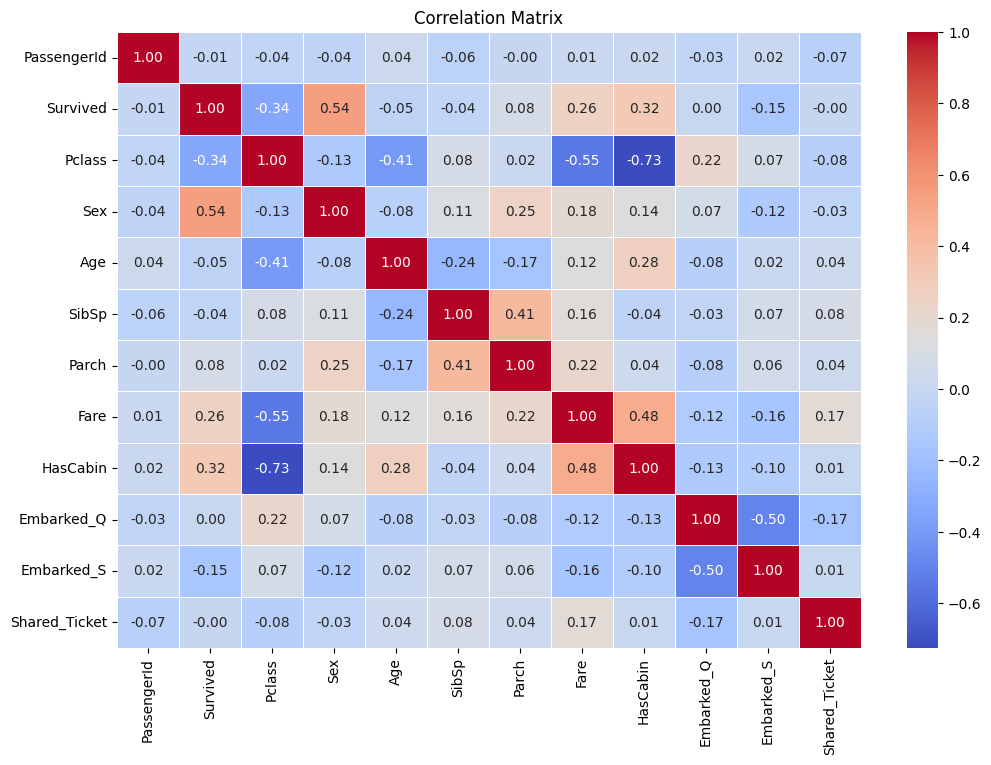

In [ ]:
corr_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#I have set the threshold to be 0.05, so dropping values which are in the range (-005<0<0.05)
df_train.drop(columns=["PassengerId", "Shared_Ticket", "Embarked_Q"], inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   HasCabin    891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


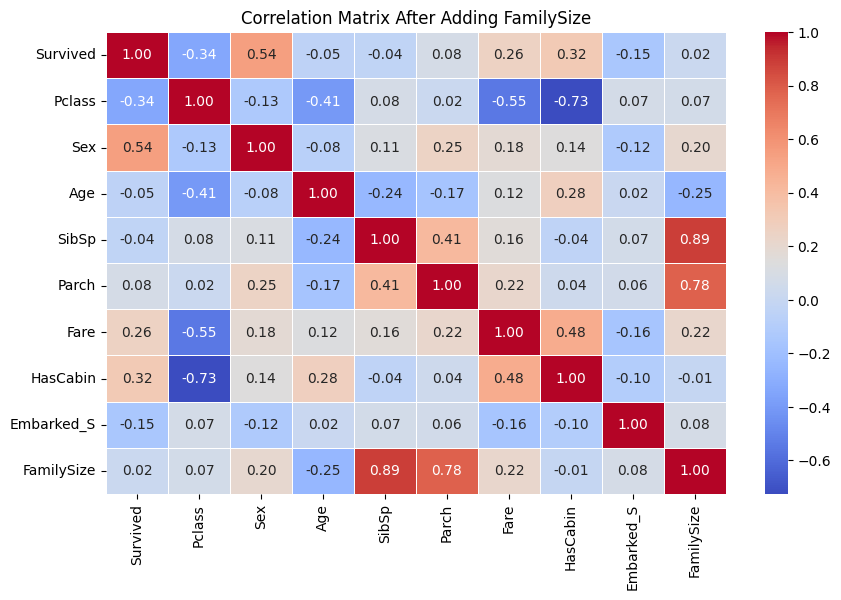

In [ ]:
#We could also drop SibSp but SibSp and Parch put together might lead to something conclusive
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
corr_matrix_new = df_train.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_new, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix After Adding FamilySize")
plt.show()

In [ ]:
df_train.drop(columns=["FamilySize", "SibSp"], inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   HasCabin    891 non-null    int64  
 7   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


Applying same transformations on df_test

In [ ]:
df_test3= pd.read_csv('/content/test.csv')


In [ ]:
df_test3["Age"] = df_test3.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))
df_test3["Embarked"].fillna(df_test3["Embarked"].mode()[0], inplace=True)
df_test3["Fare"].fillna(df_test3["Fare"].median(), inplace=True)


<ipython-input-100-c79210b28993>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test3["Embarked"].fillna(df_test3["Embarked"].mode()[0], inplace=True)
<ipython-input-100-c79210b28993>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [ ]:
df_test3["HasCabin"] = df_test3["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)
df_test3.drop(columns=["Cabin"], inplace=True)


In [ ]:
df_test3["Sex"] = df_test3["Sex"].map({"male": 0, "female": 1})
df_test3 = pd.get_dummies(df_test3, columns=["Embarked"], drop_first=True)


In [ ]:
df_test3["Embarked_Q"] = df_test3["Embarked_Q"].astype(int)
df_test3["Embarked_S"] = df_test3["Embarked_S"].astype(int)


In [ ]:
df_test3["Shared_Ticket"] = df_test3["Ticket"].apply(lambda x: 0 if x.split()[0].isdigit() else 1)
df_test3.drop(columns=["Ticket"], inplace=True)


In [ ]:
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Name           418 non-null    object 
 3   Sex            418 non-null    int64  
 4   Age            418 non-null    float64
 5   SibSp          418 non-null    int64  
 6   Parch          418 non-null    int64  
 7   Fare           418 non-null    float64
 8   HasCabin       418 non-null    int64  
 9   Embarked_Q     418 non-null    int64  
 10  Embarked_S     418 non-null    int64  
 11  Shared_Ticket  418 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 39.3+ KB


In [ ]:
df_test3.drop(columns=["PassengerId", "Shared_Ticket", "Embarked_Q", "SibSp", "Name"], inplace=True)


In [ ]:
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   HasCabin    418 non-null    int64  
 6   Embarked_S  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   HasCabin    891 non-null    int64  
 7   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
#Both are Matching

6. **Outlier Detection**


*   *Boxplots for Outlier Analysis*:

(i)Visualized Age Distribution by Survival using boxplots.

(ii)Visualized Fare Distribution by Survival using boxplots

*   *Skewness Analysis & Transformation*:

(i)Found Fare was highly right-skewed.

(ii)Applied log transformation (log1p) to normalize fare distribution.


*   *Capped Extreme Values in Parch*:

(i)Values greater than 3 were capped at 3 to reduce variance.






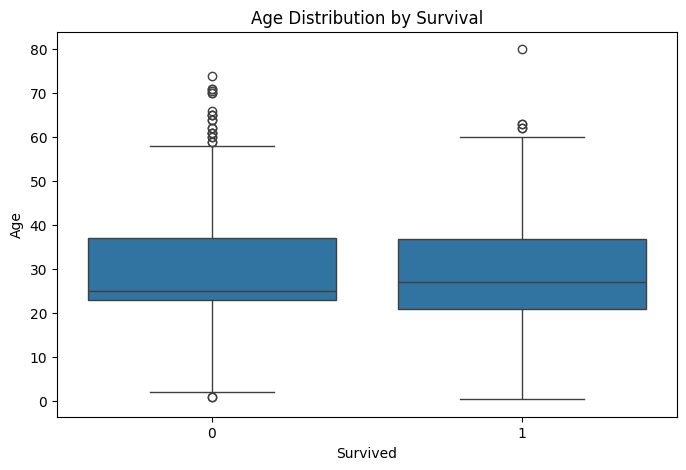

In [ ]:
#Visualizing impact of Age in Survival
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["Survived"], y=df_train["Age"])
plt.title("Age Distribution by Survival")
plt.show()

In [ ]:
#The above boxplot shows that younger passengers had a slightly higher survival rate, with outliers at older ages.

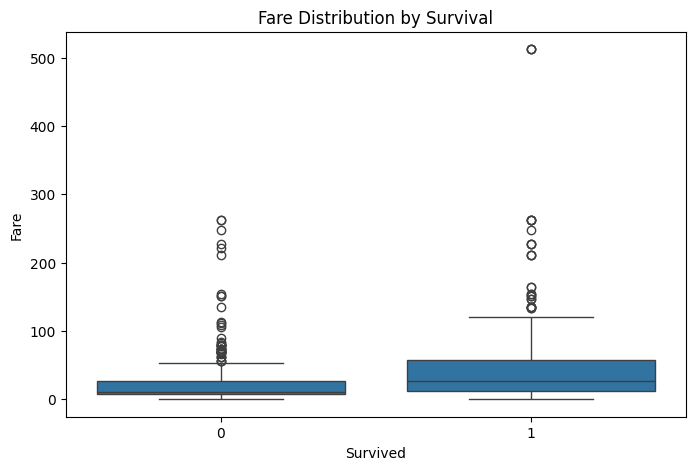

In [ ]:
#Visualizing impact of Fare in Survival
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["Survived"], y=df_train["Fare"])
plt.title("Fare Distribution by Survival")
plt.show()


In [ ]:
# The above boxplot shows higher fare-paying passengers had better survival rates, with many outliers indicating expensive tickets.

In [ ]:
df_train["Fare"].skew()

4.787316519674893

In [ ]:
#Very right skewed, we will use log transformation
df_train["Fare"] = np.log1p(df_train["Fare"])

In [ ]:
df_test3["Fare"] = np.log1p(df_test["Fare"])


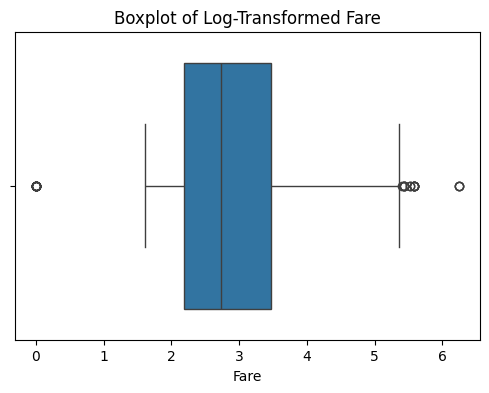

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_train["Fare"])
plt.title("Boxplot of Log-Transformed Fare")
plt.show()


In [ ]:
# By applying a log transformation, we have normalized the skewed fare distribution, making it more suitable for analysis.

In [ ]:
df_train["Fare"].skew()

0.3949280095189306

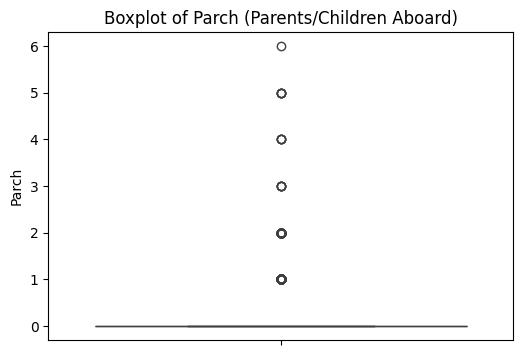

In [ ]:
#Visualizing Parch
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_train["Parch"])
plt.title("Boxplot of Parch (Parents/Children Aboard)")
plt.show()

In [ ]:
# The above boxplot shows that most passengers had zero parents/children aboard, with a few outliers representing large families.

In [ ]:
df_train["Parch"].value_counts()


,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [ ]:
#Capping Parch values of 4,5 and 6 at 3
df_train["Parch"] = df_train["Parch"].apply(lambda x: 3 if x > 3 else x)

In [ ]:
df_train["Parch"].value_counts()

,count
Parch,
0,678
1,118
2,80
3,15


In [ ]:
df_test3["Parch"] = df_test3["Parch"].apply(lambda x: 3 if x > 3 else x)


 7. **Addressing Class Imbalance**


*   Checked Target Variable Distribution:

(i)61.6% passengers did not survive, 38.4% survived → slight class imbalance.
*   Applied SMOTE:

(i)Used Synthetic Minority Oversampling Technique (SMOTE) to balance survival classes.

(ii)Ensured even distribution of the target variable.



In [ ]:
df_train["Survived"].value_counts(normalize=True) * 100

,proportion
Survived,
0,61.616162
1,38.383838


In [ ]:
#While it is not imbalanced too much, we can upsample '1' using SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
#Applying SMOTE
X = df_train.drop(columns=["Survived"])
y = df_train["Survived"]

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Before SMOTE:\n", y.value_counts(normalize=True) * 100)
print("\nAfter SMOTE:\n", y_smote.value_counts(normalize=True) * 100)

Before SMOTE:
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

After SMOTE:
 Survived
0    50.0
1    50.0
Name: proportion, dtype: float64


<ipython-input-129-63fca54fc495>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_original["Survived"], palette="coolwarm")
<ipython-input-129-63fca54fc495>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_smote["Survived"], palette="coolwarm")


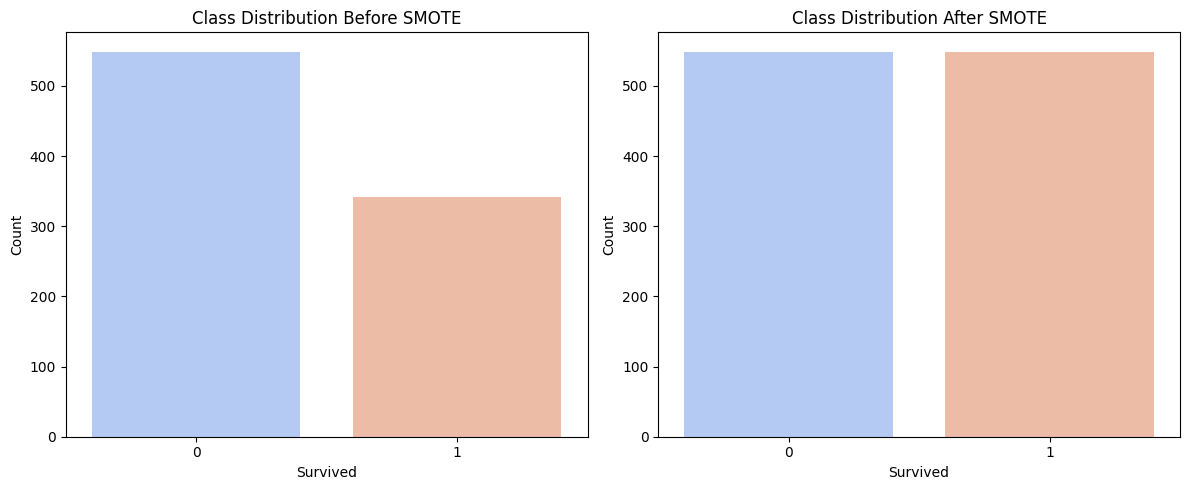

In [ ]:
df_original = pd.DataFrame({'Survived': y})
df_smote = pd.DataFrame({'Survived': y_smote})

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=df_original["Survived"], palette="coolwarm")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Survived")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=df_smote["Survived"], palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Survived")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
"""The left chart shows the class imbalance in the dataset before applying SMOTE,
where the number of non-survivors is significantly higher than survivors.
The right chart demonstrates the balanced class distribution after applying SMOTE,
ensuring an equal number of survivors and non-survivors for better model training."""

'The left chart shows the class imbalance in the dataset before applying SMOTE,\nwhere the number of non-survivors is significantly higher than survivors.\nThe right chart demonstrates the balanced class distribution after applying SMOTE,\nensuring an equal number of survivors and non-survivors for better model training.'

In [ ]:
import pandas as pd
df_train_processed = pd.read_csv('/content/df_train_processed.csv')
df_test3_processed = pd.read_csv('/content/df3_test_processed.csv')

In [ ]:
df_train_processed.head()

,Survived,Pclass,Sex,Age,Parch,Fare,HasCabin,Embarked_S
0,0,3,0,22.0,0,2.110213,0,1
1,1,1,1,38.0,0,4.280593,1,0
2,1,3,1,26.0,0,2.188856,0,1
3,1,1,1,35.0,0,3.990834,1,1
4,0,3,0,35.0,0,2.202765,0,1


In [ ]:
df_test3_processed.head()

,Pclass,Sex,Age,Parch,Fare,HasCabin,Embarked_S
0,3,0,34.5,0,2.178064,0,0
1,3,1,47.0,0,2.079442,0,1
2,2,0,62.0,0,2.369075,0,0
3,3,0,27.0,0,2.268252,0,1
4,3,1,22.0,1,2.586824,0,1


8. **Tableau Visualizations for Survival Analysis**


*   *Survival Rate by Passenger Class:* Showed survival distribution across 1st, 2nd, and 3rd class.

*   *Survival Rate by Age:* Created binned age groups and plotted their survival rate.
*   *Survival Rate by Class & Gender:* Visualized how gender and class together impacted survival rate.






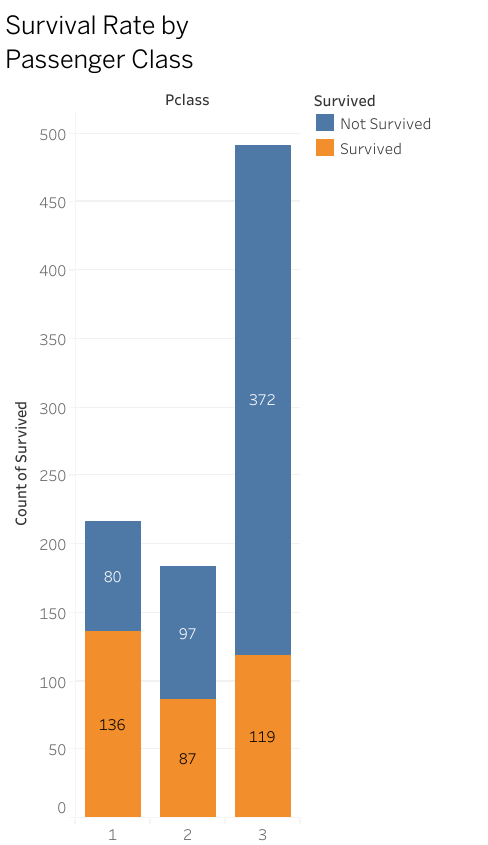

In [ ]:
from IPython.display import display
from PIL import Image

img = Image.open("Sheet1.png")
display(img)


In [ ]:
"""First-class passengers had a survival count of 136, second-class had 87, and third-class had 119.
The majority of third-class passengers (372) did not survive, compared to 80 in first-class and 97 in second-class."""

'First-class passengers had a survival count of 136, second-class had 87, and third-class had 119.\nThe majority of third-class passengers (372) did not survive, compared to 80 in first-class and 97 in second-class.'

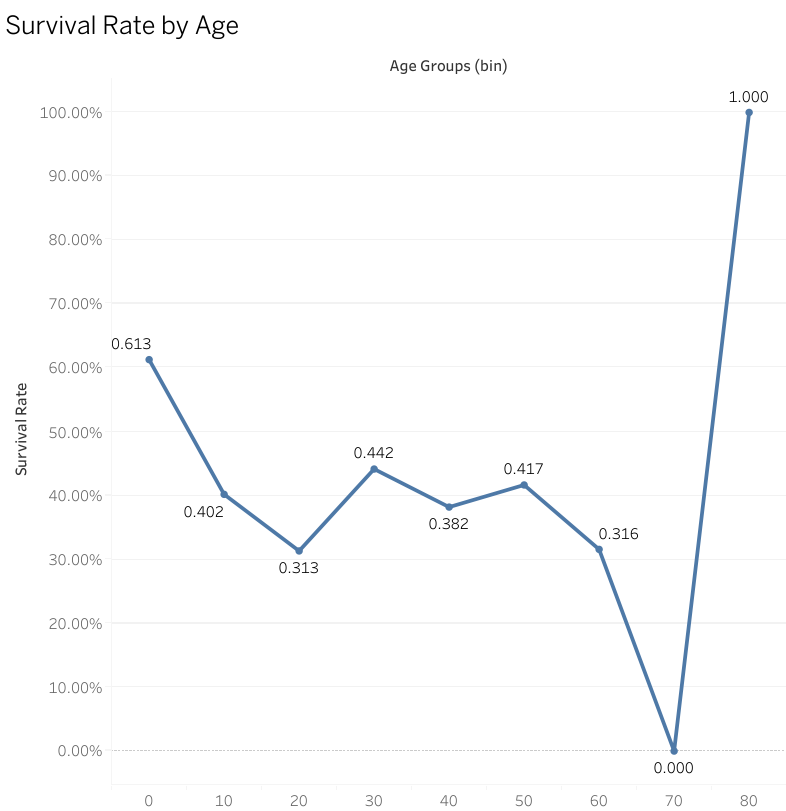

In [ ]:
from IPython.display import display
from PIL import Image

img = Image.open("/content/Sheet2.png")
display(img)

In [ ]:
"""Infants had the highest survival rate of 61.3%, while passengers aged 20-30 had the lowest survival rate at 31.3%.
The survival rate fluctuates, with older passengers (above 70) showing a 100% survival rate, though this could be due to a small sample size."""

'Infants had the highest survival rate of 61.3%, while passengers aged 20-30 had the lowest survival rate at 31.3%.\nThe survival rate fluctuates, with older passengers (above 70) showing a 100% survival rate, though this could be due to a small sample size.'

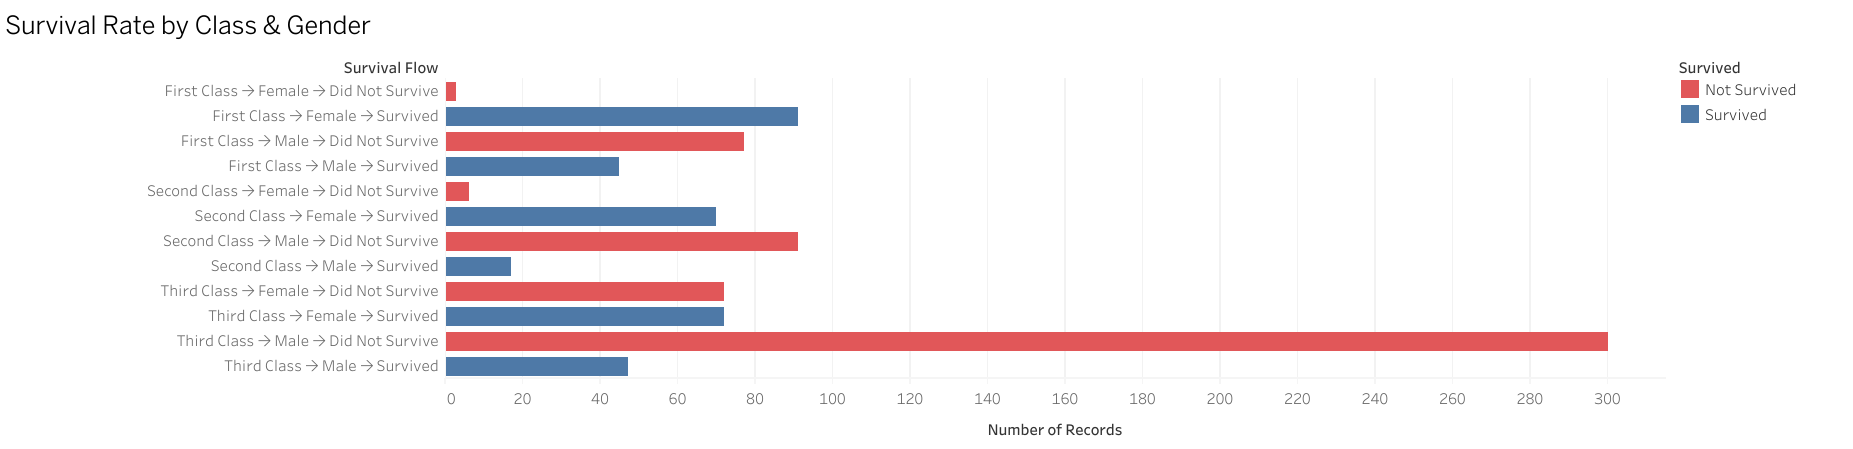

In [ ]:
from IPython.display import display
from PIL import Image

img = Image.open("/content/Sheet3.png")
display(img)

In [ ]:
"""First-class females had the highest survival count (over 90 passengers survived), while third-class males had the lowest survival rate (over 300 did not survive).
Across all classes, males had a significantly lower survival rate, especially in third class, where the majority did not survive."""

'First-class females had the highest survival count (over 90 passengers survived), while third-class males had the lowest survival rate (over 300 did not survive).\nAcross all classes, males had a significantly lower survival rate, especially in third class, where the majority did not survive.'

9. **Model Training & Hyperparameter Tuning**


*   *Trained 4 Machine Learning Models:*

(i)Logistic Regression

(ii)Support Vector Classifier (SVC)

(iii)Random Forest Classifier

(iv)XGBoost Classifier

*   *Used GridSearchCV for Hyperparameter Optimization:*

(i)Tuned hyperparameters for best performance.

(ii)Evaluated models using Classification report, accuracy, precision, recall, F1-score.



In [ ]:
#Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (878, 7)
Validation set size: (220, 7)


(i) *Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

cv_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(
    log_reg, cv_params,
    cv=5, scoring='f1', n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters from broad search:", grid_search.best_params_)



Best parameters from broad search: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

best_params = {
    'C': [0.5, 1, 2, 5],
    'solver': ['lbfgs'],
    'max_iter': [50, 100, 150]
}

grid_search = GridSearchCV(
    LogisticRegression(),
    best_params,
    cv=5, scoring='f1', n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Final best parameters:", grid_search.best_params_)




Final best parameters: {'C': 1, 'max_iter': 50, 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

final_log_reg = LogisticRegression(
    C=1,
    solver='lbfgs',
    max_iter=50
)

final_log_reg.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=50)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss

y_pred = final_log_reg.predict(X_val)
y_pred_proba = final_log_reg.predict_proba(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))
print("Log Loss:", log_loss(y_val, y_pred_proba))
print("\n Classification Report:\n", classification_report(y_val, y_pred))




Accuracy: 0.7727272727272727
Precision: 0.7586206896551724
Recall: 0.8
F1-score: 0.7787610619469026
Log Loss: 0.493496482570966

 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       110
           1       0.76      0.80      0.78       110

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



In [ ]:
import wandb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score


wandb.login()
wandb.init(project="Titanic_Survival_Analysis", name="LogReg_Fixed", reinit=True)


num_epochs = 10
learning_rates = [0.01, 0.02, 0.015, 0.005, 0.001]


log_reg = LogisticRegression(C=1, solver='lbfgs', max_iter=50)


train_losses = []
val_losses = []


for epoch in range(1, num_epochs + 1):

    log_reg.fit(X_train, y_train)


    y_train_pred_proba = log_reg.predict_proba(X_train)
    y_val_pred = log_reg.predict(X_val)
    y_val_pred_proba = log_reg.predict_proba(X_val)


    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_val, y_val_pred_proba)
    val_acc = accuracy_score(y_val, y_val_pred)


    train_losses.append(train_loss)
    val_losses.append(val_loss)


    norm_train_loss = (train_loss - min(train_losses)) / (max(train_losses) - min(train_losses) + 1e-6)
    norm_val_loss = (val_loss - min(val_losses)) / (max(val_losses) - min(val_losses) + 1e-6)


    learning_rate = learning_rates[epoch % len(learning_rates)]


    wandb.log({
        "Epoch": epoch,
        "Training Loss": norm_train_loss,
        "Validation Loss": norm_val_loss,
        "Validation Accuracy": val_acc,
        "Learning Rate": learning_rate
    })

    print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, LR: {learning_rate}")

wandb.finish()


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 1/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.02
Epoch 2/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.015
Epoch 3/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.005
Epoch 4/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 5/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.01
Epoch 6/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.02
Epoch 7/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.015
Epoch 8/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.005
Epoch 9/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.001
Epoch 10/10 - Train Loss: 0.4678, Val Loss: 0.4935, Val Acc: 0.7727, LR: 0.01


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch,▁▂▃▃▄▅▆▆▇█
Learning Rate,█▆▂▁▄█▆▂▁▄
Training Loss,▁▁▁▁▁▁▁▁▁▁
Validation Accuracy,▁▁▁▁▁▁▁▁▁▁
Validation Loss,▁▁▁▁▁▁▁▁▁▁
Epoch,10
Learning Rate,0.01
Training Loss,0
Validation Accuracy,0.77273
Validation Loss,0


(ii) *Support Vector Classifier*

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


svm_model = SVC(random_state=42)


svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_val)

In [ ]:

print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1-score: {f1_score(y_val, y_pred):.4f}")


print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.6864
Precision: 0.7412
Recall: 0.5727
F1-score: 0.6462

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72       110
           1       0.74      0.57      0.65       110

    accuracy                           0.69       220
   macro avg       0.70      0.69      0.68       220
weighted avg       0.70      0.69      0.68       220



In [ ]:
#Hyperparamter tuning
svm_params = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}


grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid=svm_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [ ]:
%%time
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 607 ms, sys: 95.4 ms, total: 702 ms
Wall time: 1min 2s


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=2)

In [ ]:
#Getting the best parameters
best_svm_params = grid_search_svm.best_params_
print("Best parameters for SVM:", best_svm_params)


Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
best_svm = SVC(**best_svm_params, random_state=42)
best_svm.fit(X_train, y_train)

SVC(C=10, gamma='auto', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


y_pred_svm = best_svm.predict(X_val)


accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)

print(" SVM Accuracy:", accuracy_svm)
print(" SVM Precision:", precision_svm)
print(" SVM Recall:", recall_svm)
print(" SVM F1-score:", f1_svm)


print("\n Classification Report for SVM:\n", classification_report(y_val, y_pred_svm))


 SVM Accuracy: 0.7954545454545454
 SVM Precision: 0.7981651376146789
 SVM Recall: 0.7909090909090909
 SVM F1-score: 0.7945205479452054

 Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       110
           1       0.80      0.79      0.79       110

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



In [ ]:
#Advanced hyperparameter tuning
svm_params_fine_tune = {
    'C': [0.1, 1, 5, 10, 50],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search_svm_fine = GridSearchCV(
    SVC(random_state=42),
    param_grid=svm_params_fine_tune,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [ ]:
%%time
grid_search_svm_fine.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 3.41 s, sys: 512 ms, total: 3.92 s
Wall time: 7min 10s


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 50],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=2)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss


best_svm = SVC(**best_svm_params, probability=True, random_state=42)
best_svm.fit(X_train, y_train)


y_pred_svm = best_svm.predict(X_val)
y_pred_svm_proba = best_svm.predict_proba(X_val)


accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)
log_loss_svm = log_loss(y_val, y_pred_svm_proba)

print("\nSVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-score:", f1_svm)
print("SVM Log Loss:", log_loss_svm)

print("\nClassification Report for SVM:\n", classification_report(y_val, y_pred_svm))



SVM Accuracy: 0.7954545454545454
SVM Precision: 0.7981651376146789
SVM Recall: 0.7909090909090909
SVM F1-score: 0.7945205479452054
SVM Log Loss: 0.42691654746298374

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       110
           1       0.80      0.79      0.79       110

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



In [ ]:
import wandb
import numpy as np
import joblib
import os
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


experiments = [
    {"optimizer": "SGD", "learning_rate": 0.01},
    {"optimizer": "SGD", "learning_rate": 0.001},
    {"optimizer": "SGD", "learning_rate": 0.0005}
]


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


for exp in experiments:
    optimizer = exp["optimizer"]
    learning_rate = exp["learning_rate"]

    wandb.init(project="Titanic_Survival_Analysis", name=f"{optimizer}_LR_{learning_rate}", reinit=True)

    sgd_model = SGDClassifier(loss="log_loss", learning_rate="constant", eta0=learning_rate, max_iter=1, random_state=42)

    classes = np.unique(y_train)

    num_epochs = 10
    for epoch in range(1, num_epochs + 1):

        X_train, y_train = shuffle(X_train, y_train, random_state=epoch)


        sgd_model.partial_fit(X_train, y_train, classes=classes)

        y_train_pred_proba = sgd_model.predict_proba(X_train)
        y_val_pred = sgd_model.predict(X_val)
        y_val_pred_proba = sgd_model.predict_proba(X_val)

        train_loss = log_loss(y_train, y_train_pred_proba)
        val_loss = log_loss(y_val, y_val_pred_proba)
        val_acc = accuracy_score(y_val, y_val_pred)

        wandb.log({
            "Epoch": epoch,
            "Training Loss": train_loss,
            "Validation Loss": val_loss,
            "Validation Accuracy": val_acc,
            "Learning Rate": learning_rate
        })

        print(f"[{optimizer} | LR: {learning_rate}] Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    model_filename = f"SGD_{optimizer}_LR_{learning_rate}.pkl"
    joblib.dump(sgd_model, model_filename)

    wandb.save(model_filename)

    wandb.finish()


[SGD | LR: 0.01] Epoch 1/10 - Train Loss: 0.4841, Val Loss: 0.5213, Val Acc: 0.7545
[SGD | LR: 0.01] Epoch 2/10 - Train Loss: 0.4728, Val Loss: 0.5095, Val Acc: 0.7500
[SGD | LR: 0.01] Epoch 3/10 - Train Loss: 0.4698, Val Loss: 0.5020, Val Acc: 0.7682
[SGD | LR: 0.01] Epoch 4/10 - Train Loss: 0.4689, Val Loss: 0.4989, Val Acc: 0.7727
[SGD | LR: 0.01] Epoch 5/10 - Train Loss: 0.4683, Val Loss: 0.4987, Val Acc: 0.7682
[SGD | LR: 0.01] Epoch 6/10 - Train Loss: 0.4681, Val Loss: 0.4973, Val Acc: 0.7727
[SGD | LR: 0.01] Epoch 7/10 - Train Loss: 0.4689, Val Loss: 0.4951, Val Acc: 0.7727
[SGD | LR: 0.01] Epoch 8/10 - Train Loss: 0.4695, Val Loss: 0.4911, Val Acc: 0.7818
[SGD | LR: 0.01] Epoch 9/10 - Train Loss: 0.4682, Val Loss: 0.4924, Val Acc: 0.7773
[SGD | LR: 0.01] Epoch 10/10 - Train Loss: 0.4676, Val Loss: 0.4940, Val Acc: 0.7773


Epoch,▁▂▃▃▄▅▆▆▇█
Learning Rate,▁▁▁▁▁▁▁▁▁▁
Training Loss,█▃▂▂▁▁▂▂▁▁
Validation Accuracy,▂▁▅▆▅▆▆█▇▇
Validation Loss,█▅▄▃▃▂▂▁▁▂
Epoch,10
Learning Rate,0.01
Training Loss,0.46764
Validation Accuracy,0.77727
Validation Loss,0.49398


[SGD | LR: 0.001] Epoch 1/10 - Train Loss: 0.5983, Val Loss: 0.6165, Val Acc: 0.7091
[SGD | LR: 0.001] Epoch 2/10 - Train Loss: 0.5549, Val Loss: 0.5820, Val Acc: 0.7182
[SGD | LR: 0.001] Epoch 3/10 - Train Loss: 0.5309, Val Loss: 0.5628, Val Acc: 0.7227
[SGD | LR: 0.001] Epoch 4/10 - Train Loss: 0.5159, Val Loss: 0.5505, Val Acc: 0.7409
[SGD | LR: 0.001] Epoch 5/10 - Train Loss: 0.5058, Val Loss: 0.5419, Val Acc: 0.7409
[SGD | LR: 0.001] Epoch 6/10 - Train Loss: 0.4985, Val Loss: 0.5356, Val Acc: 0.7455
[SGD | LR: 0.001] Epoch 7/10 - Train Loss: 0.4931, Val Loss: 0.5306, Val Acc: 0.7500
[SGD | LR: 0.001] Epoch 8/10 - Train Loss: 0.4890, Val Loss: 0.5266, Val Acc: 0.7500
[SGD | LR: 0.001] Epoch 9/10 - Train Loss: 0.4857, Val Loss: 0.5234, Val Acc: 0.7500
[SGD | LR: 0.001] Epoch 10/10 - Train Loss: 0.4831, Val Loss: 0.5207, Val Acc: 0.7500


Epoch,▁▂▃▃▄▅▆▆▇█
Learning Rate,▁▁▁▁▁▁▁▁▁▁
Training Loss,█▅▄▃▂▂▂▁▁▁
Validation Accuracy,▁▃▃▆▆▇████
Validation Loss,█▅▄▃▃▂▂▁▁▁
Epoch,10
Learning Rate,0.001
Training Loss,0.48312
Validation Accuracy,0.75
Validation Loss,0.52074


[SGD | LR: 0.0005] Epoch 1/10 - Train Loss: 0.6361, Val Loss: 0.6467, Val Acc: 0.7045
[SGD | LR: 0.0005] Epoch 2/10 - Train Loss: 0.5987, Val Loss: 0.6167, Val Acc: 0.7091
[SGD | LR: 0.0005] Epoch 3/10 - Train Loss: 0.5733, Val Loss: 0.5965, Val Acc: 0.7182
[SGD | LR: 0.0005] Epoch 4/10 - Train Loss: 0.5549, Val Loss: 0.5819, Val Acc: 0.7182
[SGD | LR: 0.0005] Epoch 5/10 - Train Loss: 0.5414, Val Loss: 0.5711, Val Acc: 0.7182
[SGD | LR: 0.0005] Epoch 6/10 - Train Loss: 0.5309, Val Loss: 0.5627, Val Acc: 0.7273
[SGD | LR: 0.0005] Epoch 7/10 - Train Loss: 0.5226, Val Loss: 0.5559, Val Acc: 0.7273
[SGD | LR: 0.0005] Epoch 8/10 - Train Loss: 0.5159, Val Loss: 0.5504, Val Acc: 0.7364
[SGD | LR: 0.0005] Epoch 9/10 - Train Loss: 0.5104, Val Loss: 0.5458, Val Acc: 0.7364
[SGD | LR: 0.0005] Epoch 10/10 - Train Loss: 0.5058, Val Loss: 0.5418, Val Acc: 0.7409


Epoch,▁▂▃▃▄▅▆▆▇█
Learning Rate,▁▁▁▁▁▁▁▁▁▁
Training Loss,█▆▅▄▃▂▂▂▁▁
Validation Accuracy,▁▂▄▄▄▅▅▇▇█
Validation Loss,█▆▅▄▃▂▂▂▁▁
Epoch,10
Learning Rate,0.0005
Training Loss,0.50578
Validation Accuracy,0.74091
Validation Loss,0.54184


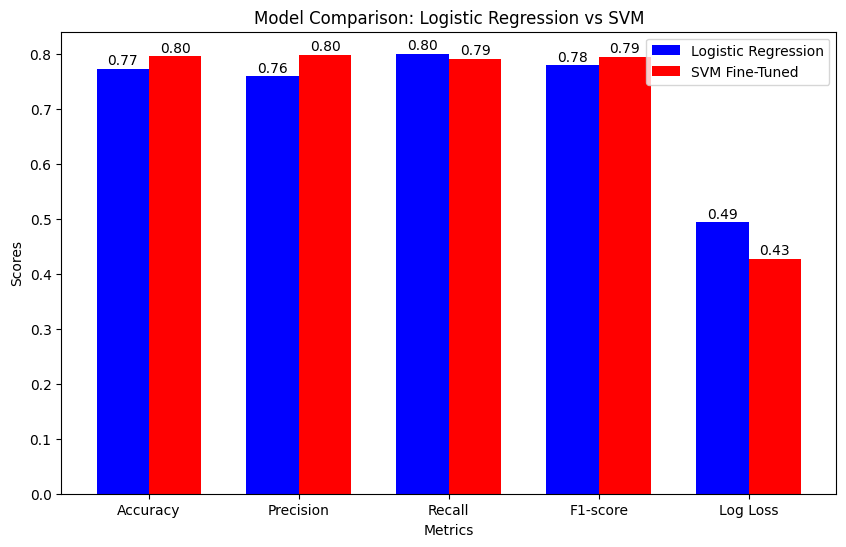

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "Log Loss"]

log_reg_values = [
    0.7727,
    0.7586,
    0.8,
    0.7787,
    0.4935
]

svm_values = [
    0.7954,
    0.7982,
    0.7909,
    0.7945,
    0.4269
]

x = np.arange(len(metrics))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))


bars1 = ax.bar(x - width/2, log_reg_values, width, label="Logistic Regression", color="blue")
bars2 = ax.bar(x + width/2, svm_values, width, label="SVM Fine-Tuned", color="red")

ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Model Comparison: Logistic Regression vs SVM")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10, color='black')

plt.show()


In [ ]:
"""The improvements are marginal, so we should explore Random Forest to see if it can capture more complex patterns
and further improve performance."""

'The improvements are marginal, so we should explore Random Forest to see if it can capture more complex patterns\nand further improve performance.'

(iii). *Random Forest*

In [ ]:
import wandb
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report

wandb.login()


True

In [ ]:

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [ ]:
best_rf_params = grid_search_rf.best_params_
print("\nBest parameters for Random Forest:", best_rf_params)


Best parameters for Random Forest: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)

best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
y_train_pred_proba = best_rf.predict_proba(X_train)
y_val_pred = best_rf.predict(X_val)
y_val_pred_proba = best_rf.predict_proba(X_val)

train_loss = log_loss(y_train, y_train_pred_proba)
val_loss = log_loss(y_val, y_val_pred_proba)
val_acc = accuracy_score(y_val, y_val_pred)
precision_rf = precision_score(y_val, y_val_pred)
recall_rf = recall_score(y_val, y_val_pred)
f1_rf = f1_score(y_val, y_val_pred)

In [ ]:
print("\nFine-Tuned Random Forest Performance:")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

print("\nFine-Tuned Classification Report:\n", classification_report(y_val, y_val_pred))


Fine-Tuned Random Forest Performance:
Training Loss: 0.2325
Validation Loss: 0.4396
Validation Accuracy: 0.8212
Precision: 0.8281
Recall: 0.7162
F1-score: 0.7681

Fine-Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
rf_params_fine_tune = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid_search_rf_fine = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_params_fine_tune,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


In [ ]:
grid_search_rf_fine.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400]},
             scoring='accuracy', verbose=2)

In [ ]:
best_rf_fine_params = grid_search_rf_fine.best_params_
print("\nBest parameters after fine-tuning:", best_rf_fine_params)


Best parameters after fine-tuning: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:

best_rf_fine = RandomForestClassifier(**best_rf_fine_params, random_state=42)
best_rf_fine.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:
y_train_pred_proba = best_rf_fine.predict_proba(X_train)
y_val_pred = best_rf_fine.predict(X_val)
y_val_pred_proba = best_rf_fine.predict_proba(X_val)

train_loss = log_loss(y_train, y_train_pred_proba)
val_loss = log_loss(y_val, y_val_pred_proba)
val_acc = accuracy_score(y_val, y_val_pred)
precision_rf = precision_score(y_val, y_val_pred)
recall_rf = recall_score(y_val, y_val_pred)
f1_rf = f1_score(y_val, y_val_pred)


In [ ]:
print("\nFine-Tuned Random Forest Performance (New Run):")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

print("\nFine-Tuned Classification Report:\n", classification_report(y_val, y_val_pred))


Fine-Tuned Random Forest Performance (New Run):
Training Loss: 0.2257
Validation Loss: 0.4294
Validation Accuracy: 0.8324
Precision: 0.8333
Recall: 0.7432
F1-score: 0.7857

Fine-Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
import wandb
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

experiments = [
    {"n_estimators": 100, "max_depth": 20, "min_samples_split": 5, "min_samples_leaf": 2, "bootstrap": True},
    {"n_estimators": 200, "max_depth": 30, "min_samples_split": 10, "min_samples_leaf": 4, "bootstrap": False},
    {"n_estimators": 300, "max_depth": None, "min_samples_split": 2, "min_samples_leaf": 1, "bootstrap": True}
]

learning_rates = [0.001, 0.0005, 0.0001]


In [ ]:
for idx, exp in enumerate(experiments):
    wandb.init(project="Titanic_Survival_Analysis", name=f"RF_Exp_{idx+1}", reinit=True)

    rf_model = RandomForestClassifier(
        n_estimators=exp["n_estimators"],
        max_depth=exp["max_depth"],
        min_samples_split=exp["min_samples_split"],
        min_samples_leaf=exp["min_samples_leaf"],
        bootstrap=exp["bootstrap"],
        random_state=42
    )


    rf_model.fit(X_train, y_train)

    y_train_pred_proba = rf_model.predict_proba(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_val_pred_proba = rf_model.predict_proba(X_val)

    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_val, y_val_pred_proba)
    val_acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    wandb.log({
        "Training Loss": train_loss,
        "Validation Loss": val_loss,
        "Validation Accuracy": val_acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Learning Rate": learning_rates[idx % len(learning_rates)],
        "n_estimators": exp["n_estimators"],
        "max_depth": exp["max_depth"],
        "min_samples_split": exp["min_samples_split"],
        "min_samples_leaf": exp["min_samples_leaf"],
        "bootstrap": exp["bootstrap"]
    })

    print(f" Experiment {idx+1}: Accuracy = {val_acc:.4f}, F1-score = {f1:.4f}")

    model_filename = f"RF_Exp_{idx+1}.pkl"
    joblib.dump(rf_model, model_filename)

    wandb.save(model_filename)

    wandb.finish()


 Experiment 1: Accuracy = 0.8324, F1-score = 0.7826


F1-score,▁
Learning Rate,▁
Precision,▁
Recall,▁
Training Loss,▁
Validation Accuracy,▁
Validation Loss,▁
max_depth,▁
min_samples_leaf,▁
min_samples_split,▁
n_estimators,▁


 Experiment 2: Accuracy = 0.8324, F1-score = 0.7857


F1-score,▁
Learning Rate,▁
Precision,▁
Recall,▁
Training Loss,▁
Validation Accuracy,▁
Validation Loss,▁
max_depth,▁
min_samples_leaf,▁
min_samples_split,▁
n_estimators,▁


 Experiment 3: Accuracy = 0.7933, F1-score = 0.7517


F1-score,▁
Learning Rate,▁
Precision,▁
Recall,▁
Training Loss,▁
Validation Accuracy,▁
Validation Loss,▁
min_samples_leaf,▁
min_samples_split,▁
n_estimators,▁
F1-score,0.75168


In [ ]:
#Comparing Logistic regression vs SVM vs Random forest

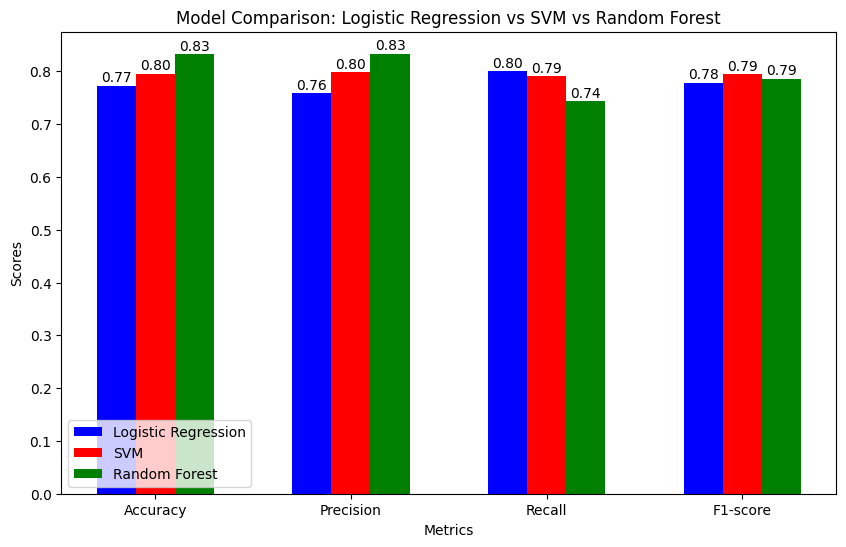

In [ ]:
# 1. Bar Chart
import numpy as np
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
log_reg_values = [0.7727, 0.7586, 0.8, 0.7787]
svm_values = [0.7954, 0.7982, 0.7909, 0.7945]
rf_values = [0.8324, 0.8333, 0.7432, 0.7857]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, log_reg_values, width, label="Logistic Regression", color="blue")
bars2 = ax.bar(x, svm_values, width, label="SVM", color="red")
bars3 = ax.bar(x + width, rf_values, width, label="Random Forest", color="green")

ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Model Comparison: Logistic Regression vs SVM vs Random Forest")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for bar in bars1 + bars2 + bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10, color='black')

plt.show()


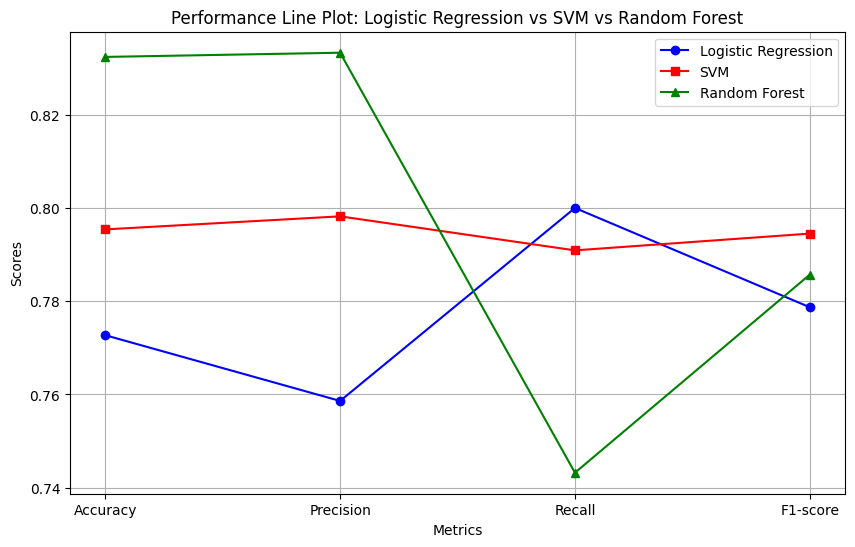

In [ ]:
#2. Line plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(metrics, log_reg_values, marker='o', linestyle='-', color='blue', label="Logistic Regression")
ax.plot(metrics, svm_values, marker='s', linestyle='-', color='red', label="SVM")
ax.plot(metrics, rf_values, marker='^', linestyle='-', color='green', label="Random Forest")

ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Performance Line Plot: Logistic Regression vs SVM vs Random Forest")
ax.legend()
ax.grid(True)

plt.show()

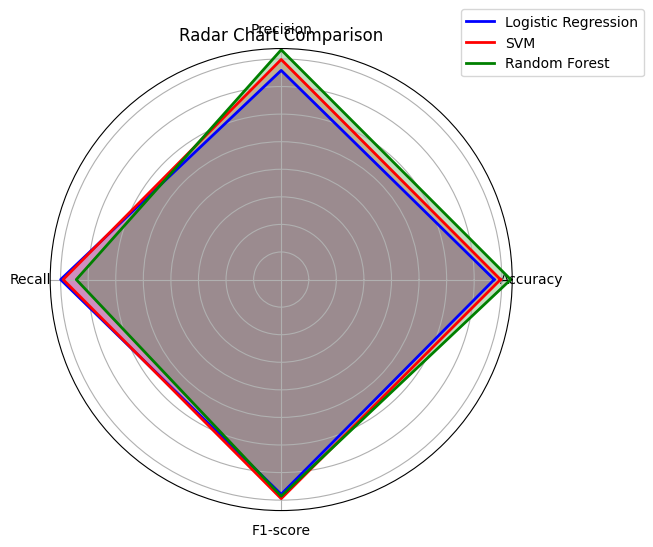

In [ ]:
#3. Radar chart
labels = np.array(metrics)
stats_log = np.array(log_reg_values)
stats_svm = np.array(svm_values)
stats_rf = np.array(rf_values)

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats_log = np.concatenate((stats_log, [stats_log[0]]))
stats_svm = np.concatenate((stats_svm, [stats_svm[0]]))
stats_rf = np.concatenate((stats_rf, [stats_rf[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats_log, color="blue", alpha=0.25)
ax.fill(angles, stats_svm, color="red", alpha=0.25)
ax.fill(angles, stats_rf, color="green", alpha=0.25)

ax.plot(angles, stats_log, color="blue", linewidth=2, label="Logistic Regression")
ax.plot(angles, stats_svm, color="red", linewidth=2, label="SVM")
ax.plot(angles, stats_rf, color="green", linewidth=2, label="Random Forest")

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Radar Chart Comparison")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()

In [ ]:
#Random Forest gave better performance than the two other Machine Learning models, but we will try another model to see if it works better

(iv). *XgBoost*

In [ ]:
# Preprocessing data differently for XgBoost

X_train_xgb = pd.get_dummies(X_train, drop_first=True)
X_val_xgb = pd.get_dummies(X_val, drop_first=True)

X_train_xgb, X_val_xgb = X_train_xgb.align(X_val_xgb, join="left", axis=1, fill_value=0)

In [ ]:
(X_train_xgb == 0).sum()


,0
Pclass,0
Sex,467
Age,0
Parch,541
Fare,13
HasCabin,553
Embarked_S,185


In [ ]:
(X_val_xgb == 0).sum()

,0
Pclass,0
Sex,110
Age,0
Parch,137
Fare,2
HasCabin,134
Embarked_S,60


In [ ]:
# Converting binary features from (0,1) to (-1,1) to avoid treating 0 as missing
binary_features = ['Sex', 'HasCabin', 'Embarked_S', 'Parch', 'Fare']
for col in binary_features:
    X_train_xgb[col] = X_train_xgb[col].replace({0: -1})
    X_val_xgb[col] = X_val_xgb[col].replace({0: -1})

xgb_model = XGBClassifier(missing=np.nan, random_state=42)


In [ ]:
(X_train_xgb == 0).sum()

,0
Pclass,0
Sex,0
Age,0
Parch,0
Fare,0
HasCabin,0
Embarked_S,0


In [ ]:
(X_val_xgb == 0).sum()

,0
Pclass,0
Sex,0
Age,0
Parch,0
Fare,0
HasCabin,0
Embarked_S,0


In [ ]:
X_train_xgb = X_train_xgb.astype("float")
X_val_xgb = X_val_xgb.astype("float")

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_xgb, y_train)
y_pred_xgb = xgb_model.predict(X_val_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:41:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import sklearn
import xgboost
print("Scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)


Scikit-learn version: 1.6.1
XGBoost version: 2.1.3


In [ ]:
!pip install xgboost
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_xgb, label=y_train)
dtest = xgb.DMatrix(X_val_xgb, label=y_val)

params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.1,
    'eval_metric': 'logloss',
    'subsample': 0.8
}


xgb_model = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb_binary = [1 if p > 0.5 else 0 for p in y_pred_xgb]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_val, y_pred_xgb_binary)
precision = precision_score(y_val, y_pred_xgb_binary)
recall = recall_score(y_val, y_pred_xgb_binary)
f1 = f1_score(y_val, y_pred_xgb_binary)

print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Precision: {precision:.4f}")
print(f"XGBoost Recall: {recall:.4f}")
print(f"XGBoost F1-score: {f1:.4f}")

print("\n Classification Report for XGBoost:\n", classification_report(y_val, y_pred_xgb_binary))



XGBoost Accuracy: 0.8101
XGBoost Precision: 0.7857
XGBoost Recall: 0.7432
XGBoost F1-score: 0.7639

 Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



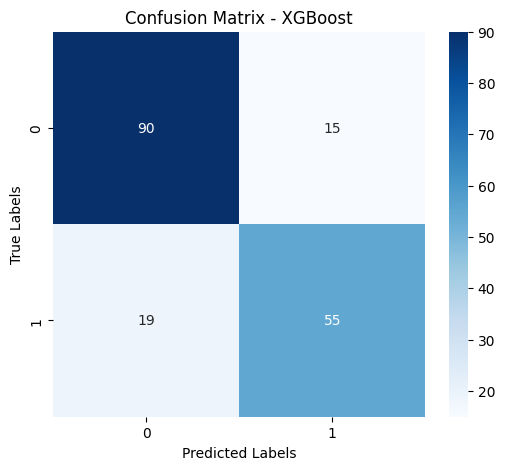

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_val, y_pred_xgb_binary), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [ ]:
"""The XGBoost model performs well with 90 true negatives and 55 true positives, but has 15 false positives and 19 false negatives,
indicating a slight bias toward predicting class 0.
To improve recall, tuning hyperparameters like learning rate, max depth, or boosting rounds may help reduce false negatives."""

'The XGBoost model performs well with 90 true negatives and 55 true positives, but has 15 false positives and 19 false negatives,\nindicating a slight bias toward predicting class 0.\nTo improve recall, tuning hyperparameters like learning rate, max depth, or boosting rounds may help reduce false negatives.'

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:41:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "C", "max_iter", "solver" } are not used.

  warnings.warn(smsg, UserWarning)


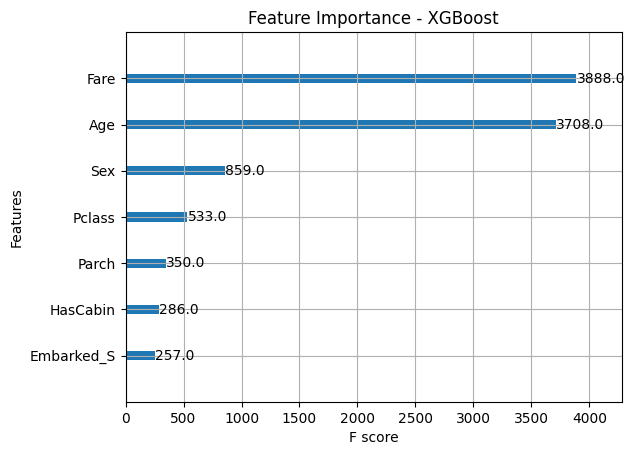

In [ ]:
xgb_model = xgb.train(best_params, dtrain, num_boost_round=800)


xgb.plot_importance(xgb_model)
plt.title("Feature Importance - XGBoost")
plt.show()


In [ ]:
#The feature importance plot for XGBoost shows that Fare (3888.0) and Age (3708.0) are the most influential factors in predicting survival.

In [ ]:
#Tuning manually
param_variations = [
    {'max_depth': 3, 'learning_rate': 0.05, 'n_estimators': 200, 'subsample': 0.8, 'colsample_bytree': 0.8},
    {'max_depth': 4, 'learning_rate': 0.05, 'n_estimators': 300, 'subsample': 0.9, 'colsample_bytree': 0.9},
    {'max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 150, 'subsample': 0.7, 'colsample_bytree': 0.7},
]

for params in param_variations:
    print(f"\nTraining with params: {params}")

    params['objective'] = 'binary:logistic'
    params['eval_metric'] = 'logloss'


    xgb_model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

    y_pred_xgb = xgb_model.predict(dtest)
    y_pred_xgb_binary = [1 if p > 0.5 else 0 for p in y_pred_xgb]

    accuracy = accuracy_score(y_val, y_pred_xgb_binary)
    f1 = f1_score(y_val, y_pred_xgb_binary)
    print(f"Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")



Training with params: {'max_depth': 3, 'learning_rate': 0.05, 'n_estimators': 200, 'subsample': 0.8, 'colsample_bytree': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:41:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8268, F1-score: 0.7737

Training with params: {'max_depth': 4, 'learning_rate': 0.05, 'n_estimators': 300, 'subsample': 0.9, 'colsample_bytree': 0.9}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:41:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8268, F1-score: 0.7801

Training with params: {'max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 150, 'subsample': 0.7, 'colsample_bytree': 0.7}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:41:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8045, F1-score: 0.7619


In [ ]:
# Define new hyperparameter combinations
param_variations = [
    {'max_depth': 2, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0.01, 'lambda': 1},
    {'max_depth': 3, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'alpha': 0.1, 'lambda': 1},
    {'max_depth': 4, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 1.0, 'alpha': 0.1, 'lambda': 1.5},
]

for params in param_variations:
    print(f"\nTraining with params: {params}")

    params['objective'] = 'binary:logistic'
    params['eval_metric'] = 'logloss'

    dtrain = xgb.DMatrix(X_train_xgb, label=y_train)
    dtest = xgb.DMatrix(X_val_xgb, label=y_val)


    xgb_model = xgb.train(params, dtrain, num_boost_round=500,
                          evals=[(dtest, "eval")],
                          early_stopping_rounds=15, verbose_eval=True)


    y_pred_xgb = xgb_model.predict(dtest)
    y_pred_xgb_binary = [1 if p > 0.5 else 0 for p in y_pred_xgb]

    accuracy = accuracy_score(y_val, y_pred_xgb_binary)
    f1 = f1_score(y_val, y_pred_xgb_binary)
    print(f"Final Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")


Training with params: {'max_depth': 2, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0.01, 'lambda': 1}
[0]	eval-logloss:0.67079
[1]	eval-logloss:0.66650
[2]	eval-logloss:0.65626
[3]	eval-logloss:0.64749
[4]	eval-logloss:0.63760
[5]	eval-logloss:0.63346
[6]	eval-logloss:0.62458
[7]	eval-logloss:0.61586
[8]	eval-logloss:0.60875
[9]	eval-logloss:0.60080
[10]	eval-logloss:0.59792
[11]	eval-logloss:0.59048
[12]	eval-logloss:0.58370
[13]	eval-logloss:0.58113
[14]	eval-logloss:0.57485
[15]	eval-logloss:0.57230
[16]	eval-logloss:0.56642
[17]	eval-logloss:0.56100
[18]	eval-logloss:0.55890
[19]	eval-logloss:0.55676
[20]	eval-logloss:0.55469
[21]	eval-logloss:0.54943
[22]	eval-logloss:0.54741
[23]	eval-logloss:0.54285
[24]	eval-logloss:0.53848
[25]	eval-logloss:0.53703
[26]	eval-logloss:0.53326
[27]	eval-logloss:0.52946
[28]	eval-logloss:0.52550
[29]	eval-logloss:0.52424
[30]	eval-logloss:0.52082
[31]	eval-logloss:0.51720
[32]	eval-logloss:0.51377
[33]	eval-logloss:

In [ ]:
best_params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.015,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'alpha': 0.1,
    'lambda': 2.0,
    'eval_metric': 'logloss'
}


dtrain = xgb.DMatrix(X_train_xgb, label=y_train)
dtest = xgb.DMatrix(X_val_xgb, label=y_val)

xgb_model = xgb.train(best_params, dtrain, num_boost_round=800,
                      evals=[(dtest, "eval")],
                      early_stopping_rounds=20, verbose_eval=True)

y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb_binary = [1 if p > 0.5 else 0 for p in y_pred_xgb]

accuracy = accuracy_score(y_val, y_pred_xgb_binary)
f1 = f1_score(y_val, y_pred_xgb_binary)
print(f"Final Fine-Tuned Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")


[0]	eval-logloss:0.67473
[1]	eval-logloss:0.66828
[2]	eval-logloss:0.66187
[3]	eval-logloss:0.65666
[4]	eval-logloss:0.65062
[5]	eval-logloss:0.64510
[6]	eval-logloss:0.63929
[7]	eval-logloss:0.63379
[8]	eval-logloss:0.62916
[9]	eval-logloss:0.62411
[10]	eval-logloss:0.61912
[11]	eval-logloss:0.61440
[12]	eval-logloss:0.60982
[13]	eval-logloss:0.60777
[14]	eval-logloss:0.60310
[15]	eval-logloss:0.60072
[16]	eval-logloss:0.59653
[17]	eval-logloss:0.59221
[18]	eval-logloss:0.59009
[19]	eval-logloss:0.58597
[20]	eval-logloss:0.58210
[21]	eval-logloss:0.57842
[22]	eval-logloss:0.57478
[23]	eval-logloss:0.57082
[24]	eval-logloss:0.56726
[25]	eval-logloss:0.56418
[26]	eval-logloss:0.56101
[27]	eval-logloss:0.55759
[28]	eval-logloss:0.55405
[29]	eval-logloss:0.55109
[30]	eval-logloss:0.54802
[31]	eval-logloss:0.54545
[32]	eval-logloss:0.54236
[33]	eval-logloss:0.53968
[34]	eval-logloss:0.53689
[35]	eval-logloss:0.53544
[36]	eval-logloss:0.53270
[37]	eval-logloss:0.53007
[38]	eval-logloss:0.52

In [ ]:
import wandb
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

param_variations = [
    {'max_depth': 2, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0.01, 'lambda': 1},
    {'max_depth': 3, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'alpha': 0.1, 'lambda': 1},
    {'max_depth': 4, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 1.0, 'alpha': 0.1, 'lambda': 1.5},
]

best_accuracy = 0
best_model = None
best_params = None

for params in param_variations:
    print(f"\n🔹 Training with params: {params}")

    params['objective'] = 'binary:logistic'
    params['eval_metric'] = ['logloss']

    wandb.init(project="Titanic_Survival_Analysis",
               name=f"XGBoost_LR_{params['learning_rate']}_Depth_{params['max_depth']}",
               reinit=True)

    wandb.config.update(params)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_val, label=y_val)

    evals_result = {}
    xgb_model = xgb.train(params, dtrain, num_boost_round=500,
                          evals=[(dtrain, "train"), (dtest, "eval")],
                          early_stopping_rounds=15, verbose_eval=True,
                          evals_result=evals_result)

    y_pred_xgb = xgb_model.predict(dtest)
    y_pred_xgb_binary = [1 if p > 0.5 else 0 for p in y_pred_xgb]

    accuracy = accuracy_score(y_val, y_pred_xgb_binary)
    precision = precision_score(y_val, y_pred_xgb_binary, zero_division=1)
    recall = recall_score(y_val, y_pred_xgb_binary)
    f1 = f1_score(y_val, y_pred_xgb_binary)

    if "logloss" in evals_result["train"] and "logloss" in evals_result["eval"]:
        train_loss = evals_result["train"]["logloss"][-1]
        val_loss = evals_result["eval"]["logloss"][-1]
    else:
        train_loss = log_loss(y_train, xgb_model.predict(dtrain))
        val_loss = log_loss(y_val, y_pred_xgb)

    wandb.log({
        "Training Loss": train_loss,
        "Validation Loss": val_loss,
        "Validation Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Learning Rate": params['learning_rate']
    })

    print(f"Completed Training for LR {params['learning_rate']}: Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = xgb_model
        best_params = params

    wandb.finish()

print("\n Best Model Parameters:", best_params)
print(f"Best Accuracy Achieved: {best_accuracy:.4f}")



🔹 Training with params: {'max_depth': 2, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0.01, 'lambda': 1}


[0]	train-logloss:0.65217	eval-logloss:0.67079
[1]	train-logloss:0.64820	eval-logloss:0.66650
[2]	train-logloss:0.63906	eval-logloss:0.65626
[3]	train-logloss:0.63066	eval-logloss:0.64749
[4]	train-logloss:0.62061	eval-logloss:0.63760
[5]	train-logloss:0.61690	eval-logloss:0.63346
[6]	train-logloss:0.60814	eval-logloss:0.62458
[7]	train-logloss:0.59960	eval-logloss:0.61586
[8]	train-logloss:0.59299	eval-logloss:0.60875
[9]	train-logloss:0.58535	eval-logloss:0.60080
[10]	train-logloss:0.58265	eval-logloss:0.59792
[11]	train-logloss:0.57547	eval-logloss:0.59048
[12]	train-logloss:0.56884	eval-logloss:0.58370
[13]	train-logloss:0.56676	eval-logloss:0.58113
[14]	train-logloss:0.56031	eval-logloss:0.57485
[15]	train-logloss:0.55830	eval-logloss:0.57230
[16]	train-logloss:0.55257	eval-logloss:0.56642
[17]	train-logloss:0.54676	eval-logloss:0.56100
[18]	train-logloss:0.54490	eval-logloss:0.55890
[19]	train-logloss:0.54287	eval-logloss:0.55676
[20]	train-logloss:0.54109	eval-logloss:0.55469
[2

F1-score,▁
Learning Rate,▁
Precision,▁
Recall,▁
Training Loss,▁
Validation Accuracy,▁
Validation Loss,▁
F1-score,0.76812
Learning Rate,0.03
Precision,0.82812
Recall,0.71622



🔹 Training with params: {'max_depth': 3, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'alpha': 0.1, 'lambda': 1}


[0]	train-logloss:0.65455	eval-logloss:0.67305
[1]	train-logloss:0.64602	eval-logloss:0.66477
[2]	train-logloss:0.63793	eval-logloss:0.65685
[3]	train-logloss:0.63134	eval-logloss:0.65039
[4]	train-logloss:0.62379	eval-logloss:0.64294
[5]	train-logloss:0.61654	eval-logloss:0.63610
[6]	train-logloss:0.60954	eval-logloss:0.62923
[7]	train-logloss:0.60293	eval-logloss:0.62266
[8]	train-logloss:0.59716	eval-logloss:0.61705
[9]	train-logloss:0.59113	eval-logloss:0.61102
[10]	train-logloss:0.58498	eval-logloss:0.60523
[11]	train-logloss:0.57926	eval-logloss:0.59952
[12]	train-logloss:0.57391	eval-logloss:0.59430
[13]	train-logloss:0.57169	eval-logloss:0.59218
[14]	train-logloss:0.56616	eval-logloss:0.58681
[15]	train-logloss:0.56420	eval-logloss:0.58433
[16]	train-logloss:0.55933	eval-logloss:0.57962
[17]	train-logloss:0.55430	eval-logloss:0.57471
[18]	train-logloss:0.55232	eval-logloss:0.57217
[19]	train-logloss:0.54755	eval-logloss:0.56734
[20]	train-logloss:0.54298	eval-logloss:0.56274
[2

F1-score,▁
Learning Rate,▁
Precision,▁
Recall,▁
Training Loss,▁
Validation Accuracy,▁
Validation Loss,▁
F1-score,0.74453
Learning Rate,0.02
Precision,0.80952
Recall,0.68919



🔹 Training with params: {'max_depth': 4, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 1.0, 'alpha': 0.1, 'lambda': 1.5}


[0]	train-logloss:0.65773	eval-logloss:0.67608
[1]	train-logloss:0.65326	eval-logloss:0.67168
[2]	train-logloss:0.64889	eval-logloss:0.66738
[3]	train-logloss:0.64460	eval-logloss:0.66317
[4]	train-logloss:0.64041	eval-logloss:0.65905
[5]	train-logloss:0.63629	eval-logloss:0.65502
[6]	train-logloss:0.63226	eval-logloss:0.65108
[7]	train-logloss:0.62830	eval-logloss:0.64723
[8]	train-logloss:0.62442	eval-logloss:0.64344
[9]	train-logloss:0.62062	eval-logloss:0.63975
[10]	train-logloss:0.61689	eval-logloss:0.63612
[11]	train-logloss:0.61323	eval-logloss:0.63257
[12]	train-logloss:0.60963	eval-logloss:0.62909
[13]	train-logloss:0.60611	eval-logloss:0.62568
[14]	train-logloss:0.60265	eval-logloss:0.62235
[15]	train-logloss:0.59925	eval-logloss:0.61906
[16]	train-logloss:0.59592	eval-logloss:0.61586
[17]	train-logloss:0.59264	eval-logloss:0.61271
[18]	train-logloss:0.58942	eval-logloss:0.60962
[19]	train-logloss:0.58626	eval-logloss:0.60659
[20]	train-logloss:0.58316	eval-logloss:0.60362
[2

F1-score,▁
Learning Rate,▁
Precision,▁
Recall,▁
Training Loss,▁
Validation Accuracy,▁
Validation Loss,▁
F1-score,0.77143
Learning Rate,0.01
Precision,0.81818
Recall,0.72973



 Best Model Parameters: {'max_depth': 2, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0.01, 'lambda': 1, 'objective': 'binary:logistic', 'eval_metric': ['logloss']}
Best Accuracy Achieved: 0.8212


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


models = ["Logistic Regression", "SVM", "Random Forest", "XGBoost"]
accuracy = [0.7727, 0.7954, 0.8324, 0.8101]
precision = [0.7586, 0.7982, 0.8333, 0.7857]
recall = [0.8, 0.7909, 0.7432, 0.7432]
f1_score = [0.7787, 0.7945, 0.7857, 0.7639]

df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score
})

colors = ["red", "blue", "green", "purple"]

<Figure size 1000x600 with 0 Axes>

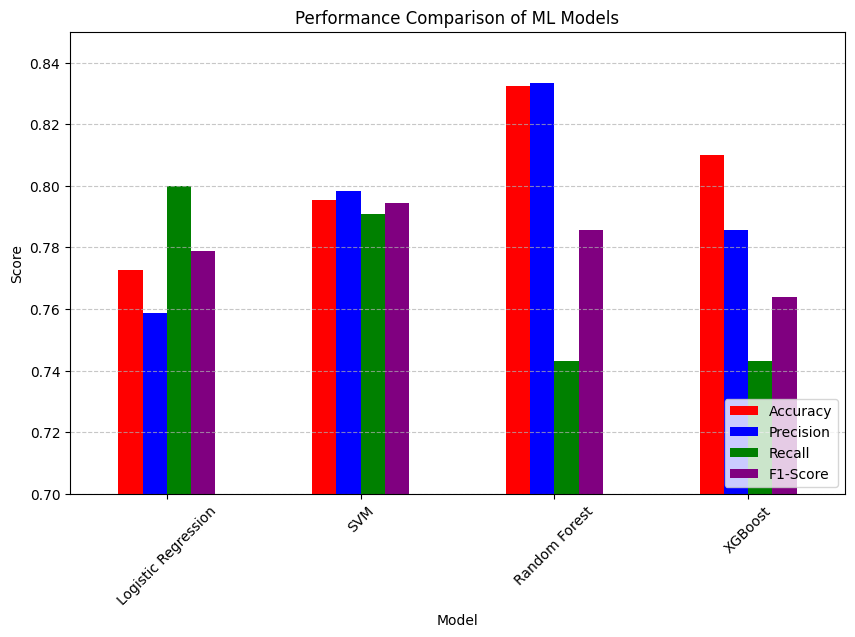

In [ ]:
#1. Bar Chart
plt.figure(figsize=(10, 6))
df.set_index("Model").plot(kind="bar", color=colors, figsize=(10, 6))
plt.title("Performance Comparison of ML Models")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0.7, 0.85)
plt.legend(loc="lower right")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

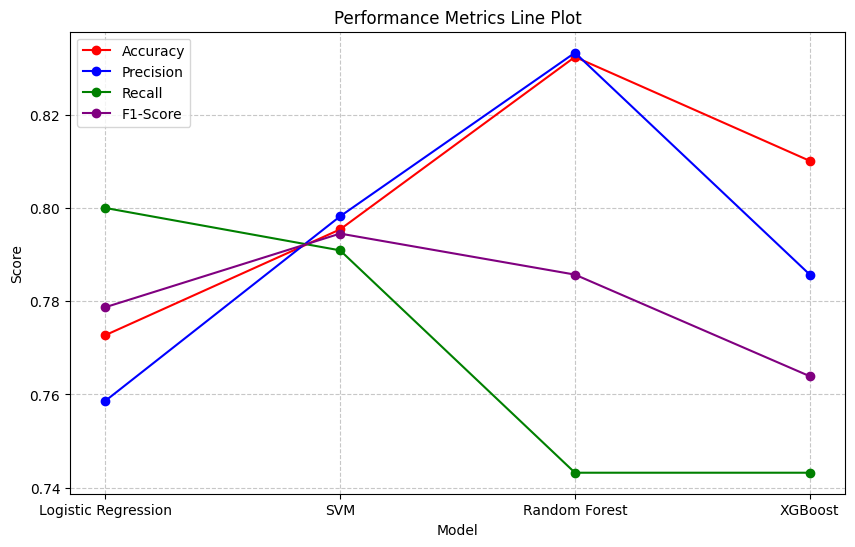

In [ ]:
#2. Line plot
plt.figure(figsize=(10, 6))
for i, metric in enumerate(["Accuracy", "Precision", "Recall", "F1-Score"]):
    plt.plot(models, df[metric], marker="o", linestyle="-", label=metric, color=colors[i])
plt.title("Performance Metrics Line Plot")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

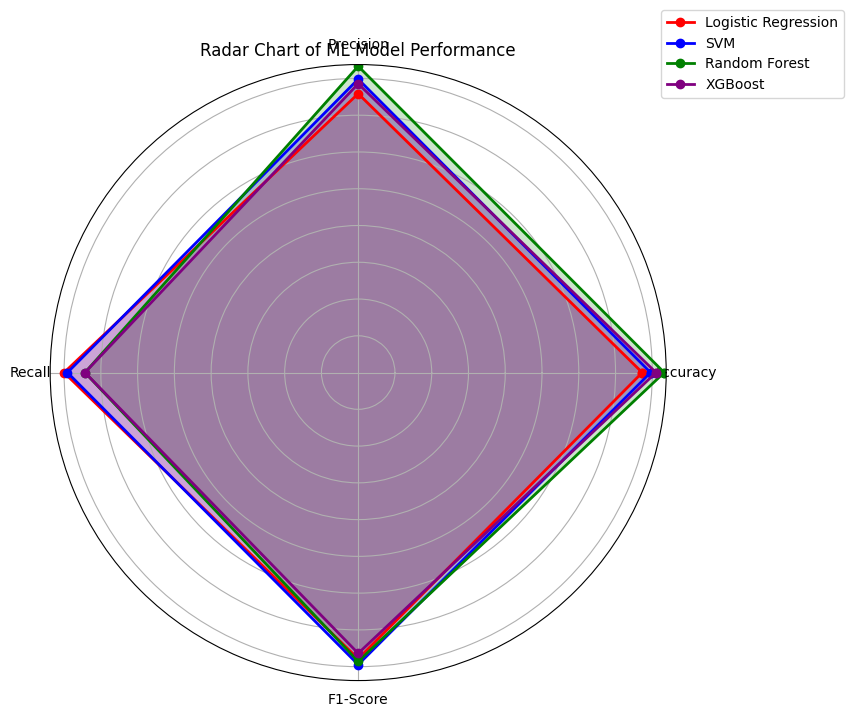

In [ ]:
#3. Radar Chart
labels = ["Accuracy", "Precision", "Recall", "F1-Score"]
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, model in enumerate(models):
    values = df.iloc[i, 1:].tolist()
    values += values[:1]
    ax.plot(angles, values, label=model, linewidth=2, linestyle="solid", marker="o", color=colors[i])
    ax.fill(angles, values, alpha=0.2, color=colors[i])

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Radar Chart of ML Model Performance")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()

**As we can see clearly from the above plot, Random Forest performed the best with an accuracy of 83.24%.**